In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean #A package with beautiful colormaps
import cartopy #Useful for plotting maps
import cartopy.util #Requires separate import
import cartopy.crs as ccrs
import pandas as pd
from scipy import stats

plot_path = '/home/u/u241308/figures/'

In [2]:
#--------------------- select location ---------------------
location = 'Europe'
#location = 'North_America'
#location = 'Asia'

In [3]:
#--------------------- select HW parameters ---------------------
#Reference period
ref_min = 1985
ref_max = 2014

# Consecutive days for heatwave detection
c_days = 6

# Threshold percentile
percentile = 90 #95

#Definition type: daily moving threshold (mov_day) or JA moving threshold (mov_JA)
def_type = 'fix_day'

# Set the location

In [4]:
location = 'Europe' #'North_America','Asia'

In [5]:
if location == 'Europe':
    lon_min = -10
    lon_max = 30
    lat_min = 35
    lat_max = 70
    print('Europe selected')
elif location == 'North_America':
    lon_min = -180
    lon_max = -18
    lat_min = 10
    lat_max = 85
    print('North_America selected')
elif location == 'Asia':
    lon_min = 30
    lon_max = 180
    lat_min = 20
    lat_max = 85
    print('Asia selected')

Europe selected


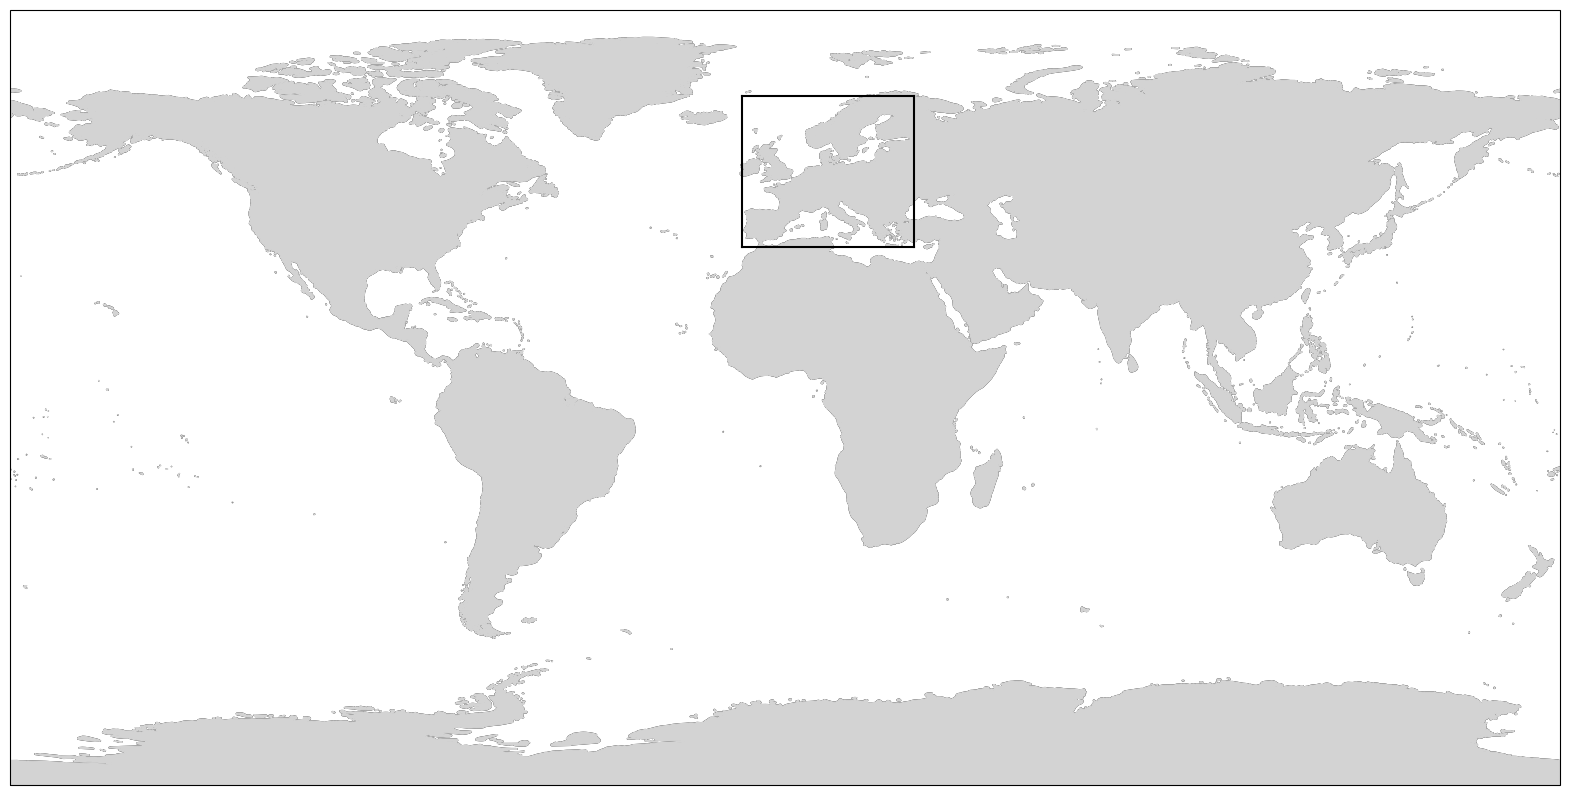

In [6]:
#plot selected area
import cartopy.feature as cfeature
(fig, axis) = plt.subplots(nrows=1, ncols=1,figsize=(20,15),subplot_kw={"projection": ccrs.PlateCarree()})
axis.coastlines(resolution='50m', color='black', linewidth=1)
axis.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='lightgrey'))
axis.set_xlim(-180,180)
axis.set_ylim(-90,90)

axis.plot([lon_min,lon_max],[lat_min,lat_min],'k')#,'b')
axis.plot([lon_min,lon_max],[lat_max,lat_max],'k')#,'b')
axis.plot([lon_max,lon_max],[lat_min,lat_max],'k')#,'b')
axis.plot([lon_min,lon_min],[lat_min,lat_max],'k')#,'b')

# Define functions

In [7]:
def change_lon(data1,shape):
    data1['lon'] = np.where(data1.lon >180, data1.lon-360,data1.lon)
    ind = np.argsort(data1.lon)
    ind.values
    if shape == 3:
        data1 = data1[:,:,ind.values]
    if shape == 2:
        data1 = data1[:,ind.values]
    return(data1)

# Load model data

In [8]:
model = 'ACCESS-ESM1-5'
ens_total = 40

In [9]:
#Define run
run_type = ['historical','ssp245','ssp585']

In [10]:
for run in range(len(run_type)):
    print('start ' + run_type[run])
    for n_ens in range(ens_total):
        # ------------------------------ load hw exceedance ----------------------------------
        path = '/work/uo1075/u241308/data_python/HW_extension/'+model+'/anomaly/hw_exceed/'
        file = 'data_exceed_lonlat_weighted_%s' %percentile + 'pct_%s' %c_days + 'd_' + def_type + '_'+model+'_'+run_type[run]+'_ref_%i'%ref_min + '-%i'%ref_max + '_ensemble_%i_anomaly.nc'%n_ens
        hw_exceed_mpi = xr.open_dataset(path+file)
        hw_exceed_mpi = hw_exceed_mpi.tasmax
        
        #Select summer months
        hw_exceed_mpi_JJA = hw_exceed_mpi[(hw_exceed_mpi.time.dt.month==6)|(hw_exceed_mpi.time.dt.month==7)|(hw_exceed_mpi.time.dt.month==8)]
        
        #select area
        lon_eu = (hw_exceed_mpi_JJA.lon >= lon_min) & (hw_exceed_mpi_JJA.lon <= lon_max)
        lat_eu = (hw_exceed_mpi_JJA.lat >= lat_min) & (hw_exceed_mpi_JJA.lat <= lat_max)
        hw_exceed_mpi_JJA_eu = hw_exceed_mpi_JJA[:,lat_eu,lon_eu]
        
        # ---------------- exceedance for each summer ----------------
        hw_exceed_sel = hw_exceed_mpi_JJA_eu.resample(time='Y').sum()
        
        # --------------------------- save max HW exceedance ----------------------------------
        path = '/work/uo1075/u241308/data_python_PostDoc/HW_expansion/anomaly/'+model+'/'+run_type[run]+'/'
        file = 'hw_exceedance_all_HW_%id'%c_days +'_%s'%percentile+ '_' + def_type + '_'+model+'_'+ run_type[run] +'_ref_%i'%ref_min + '-%i'%ref_max + '_JJA_'+location+'_ensemble_%i_anomaly'%n_ens
        np.save(path+file,hw_exceed_sel)
        
        print('Ensemble %i done' %n_ens)

start historical
Ensemble 0 done
Ensemble 1 done
Ensemble 2 done
Ensemble 3 done
Ensemble 4 done
Ensemble 5 done
Ensemble 6 done
Ensemble 7 done
Ensemble 8 done
Ensemble 9 done
Ensemble 10 done
Ensemble 11 done
Ensemble 12 done
Ensemble 13 done
Ensemble 14 done
Ensemble 15 done
Ensemble 16 done
Ensemble 17 done
Ensemble 18 done
Ensemble 19 done
Ensemble 20 done
Ensemble 21 done
Ensemble 22 done
Ensemble 23 done
Ensemble 24 done
Ensemble 25 done
Ensemble 26 done
Ensemble 27 done
Ensemble 28 done
Ensemble 29 done
Ensemble 30 done
Ensemble 31 done
Ensemble 32 done
Ensemble 33 done
Ensemble 34 done
Ensemble 35 done
Ensemble 36 done
Ensemble 37 done
Ensemble 38 done
Ensemble 39 done
start ssp245
Ensemble 0 done
Ensemble 1 done
Ensemble 2 done
Ensemble 3 done
Ensemble 4 done
Ensemble 5 done
Ensemble 6 done
Ensemble 7 done
Ensemble 8 done
Ensemble 9 done
Ensemble 10 done
Ensemble 11 done
Ensemble 12 done
Ensemble 13 done
Ensemble 14 done
Ensemble 15 done
Ensemble 16 done
Ensemble 17 done
Ense